Data yang digunakan adalah dataset tentang penggunaan aplilasi di Google Play Store. Pada data tersebut terdapat beberapa variabel yang dibutuhkan untuk dianalisis. Tujuannya adalah untuk mengetahui bagaimana target pasar yang ada di Google Play Store agar para pendiri aplikasi dapat mengembangkan penjualannya

App : Nama Aplikasi

Category : Kategori aplikasi

Rating : Peringkat penilaian pengguna secara keseluruhan

Reviews : Jumlah ulasan pada aplikasi terkait

Size : Ukuran aplikasi

Installs : Jumlah pengguna yang menginstall aplikasi

Type : Tipe aplikasi gratis atau berbayar

Price : Harga aplikasi

Content Rating : Peringkat berdasarkan tingkat usia

Genres : Genre aplikasi

In [2]:
import pandas as pd

data = pd.read_csv(r'C:\Users\ANIQ FARICHATUS\Downloads\archive (5)\googleplaystore.csv')
data.head()

C:\Users\ANIQ FARICHATUS\anaconda3\ANACONDA\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Visualisasi Data

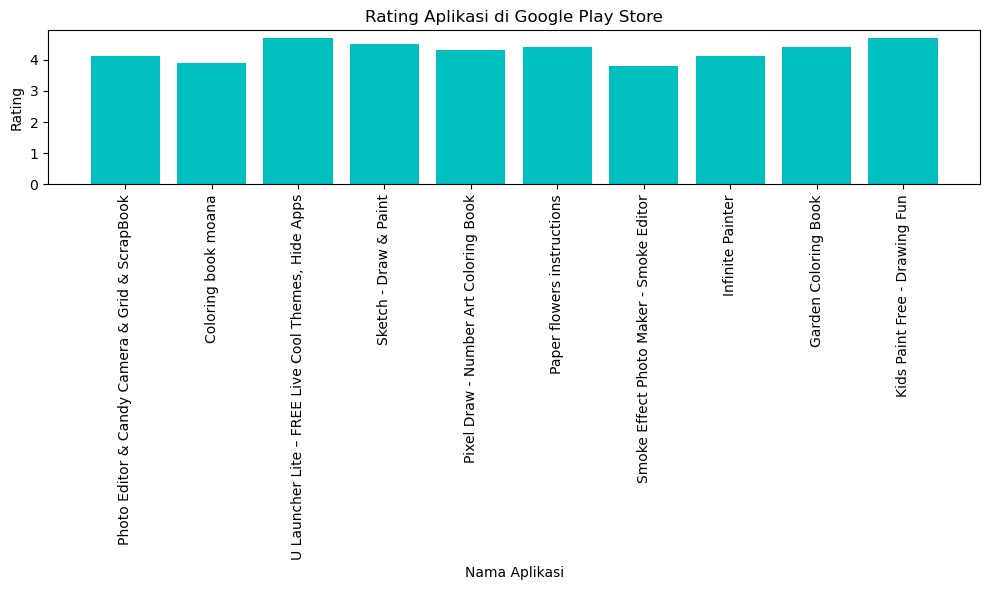

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = 'googleplaystore.csv'
data = pd.read_csv(r'C:\Users\ANIQ FARICHATUS\Downloads\archive (5)\googleplaystore.csv')

# Konversi kolom Rating menjadi numerik dan menghapus baris yang NaN
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data_cleaned = data.dropna(subset=['Rating'])

plt.figure(figsize=(10,6))
plt.bar(data_cleaned['App'][:10], data_cleaned['Rating'][:10], color='c')
plt.xticks(rotation=90)
plt.title('Rating Aplikasi di Google Play Store')
plt.xlabel('Nama Aplikasi')
plt.ylabel('Rating')
plt.tight_layout() 
plt.show()

Visualisasi diagram batang tersebut menampilkan rating dari 10 aplikasi pertama di dataset Google Play Store. Setiap batang mewakili aplikasi beserta ratingnya. Dari grafik tersebut, dapat dilihat bahwa rata-rata aplikasi memiliki rating yang cukup baik.

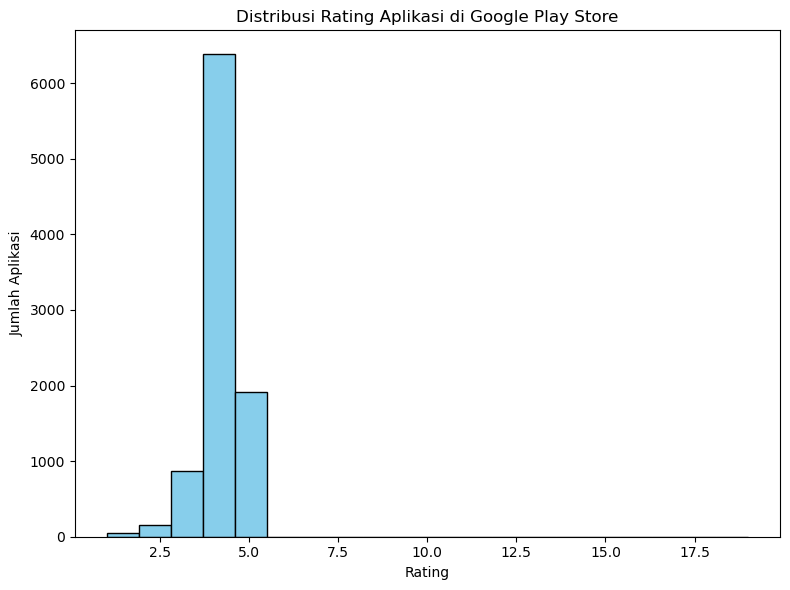

In [15]:
plt.figure(figsize=(8,6))
plt.hist(data_cleaned['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Rating Aplikasi di Google Play Store')
plt.xlabel('Rating')
plt.ylabel('Jumlah Aplikasi')
plt.tight_layout()
plt.show()

Dengan visualisasi distribusi rating aplikasi tersebut, kita dapat melihat bagaimana penyebaran rating aplikasi di dataset, misalnya apakah mayoritas aplikasi memiliki rating tinggi atau rendah.

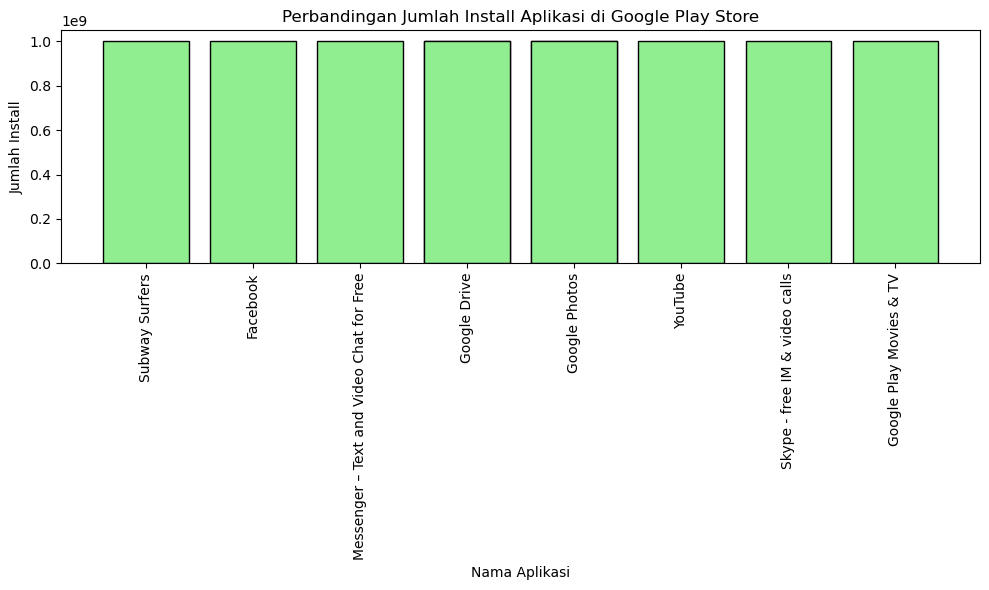

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = 'googleplaystore.csv'
data = pd.read_csv(r'C:\Users\ANIQ FARICHATUS\Downloads\archive (5)\googleplaystore.csv')

data_cleaned = data.dropna(subset=['Installs'])
data_cleaned['Installs'] = data_cleaned['Installs'].str.replace(',', '')
data_cleaned['Installs'] = data_cleaned['Installs'].str.replace('+', '')
data_cleaned['Installs'] = pd.to_numeric(data_cleaned['Installs'], errors='coerce')

# 10 aplikasi dengan jumlah install terbanyak
top_10_apps = data_cleaned.sort_values(by='Installs', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_10_apps['App'], top_10_apps['Installs'], color='lightgreen', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Perbandingan Jumlah Install Aplikasi di Google Play Store')
plt.xlabel('Nama Aplikasi')
plt.ylabel('Jumlah Install')
plt.tight_layout()
plt.show()

Diambil sebanyak 10 aplikasi dengan jumlah install terbanyak. Dari visualisasi tersebut didapati bahwa jumlah install aplikasi atau aplikasi yang paling populer adalah sama rata

# Pemusatan Data

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

csv_file_path = 'googleplaystore.csv'
data = pd.read_csv(r'C:\Users\ANIQ FARICHATUS\Downloads\archive (5)\googleplaystore.csv')

# Konversi kolom 'Rating' dan 'Reviews' menjadi numerik
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data_cleaned = data.dropna(subset=['Rating', 'Reviews'])

# Kedua kolom tsb untuk pemusatan
features = data_cleaned[['Rating', 'Reviews']]

# Min-Max Normalization
min_max_scaler = MinMaxScaler()
features_min_max_scaled = min_max_scaler.fit_transform(features)

# Dataframe untuk hasil Min-Max Normalization
df_min_max_scaled = pd.DataFrame(features_min_max_scaled, columns=['Rating', 'Reviews'])
print("Hasil Min-Max Normalization:")
print(df_min_max_scaled.head())

# Z-score Normalization (Standardization)
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Dataframe untuk hasil Z-score Normalization
df_standardized = pd.DataFrame(features_standardized, columns=['Rating', 'Reviews'])
print("\nHasil Z-score Normalization:")
print(df_standardized.head())

Hasil Min-Max Normalization:
   Rating   Reviews
0   0.775  0.000002
1   0.725  0.000012
2   0.925  0.001120
3   0.875  0.002759
4   0.825  0.000012

Hasil Z-score Normalization:
     Rating   Reviews
0 -0.178104 -0.163458
1 -0.566309 -0.163201
2  0.986512 -0.135673
3  0.598307 -0.094917
4  0.210102 -0.163201


Min-Max Normalization menunjukkan bagaimana data dinormalisasi ke dalam rentang 0 hingga 1, memudahkan untuk melihat proporsi nilai dalam dataset. Setiap nilai yang lebih tinggi pada kedua kolom menunjukkan bahwa aplikasi tersebut memiliki rating dan jumlah ulasan yang lebih tinggi dalam skala 0 hingga 1. Misalnya, Pada baris ke-3 (Rating = 0.925 dan Reviews = 0.001120), artinya rating aplikasi tersebut berada di sekitar 92.5% dari rating tertinggi, dan jumlah ulasannya berada di sekitar 0.112% dari ulasan terbanyak.

Z-score Normalization memberi tahu seberapa jauh setiap data dari rata-rata dalam satuan standar deviasi, memungkinkan untuk melihat apakah suatu aplikasi memiliki rating atau ulasan yang lebih tinggi atau lebih rendah dari rata-rata dataset. Nilai positif menunjukkan bahwa aplikasi tersebut berada di atas rata-rata (untuk rating atau jumlah ulasan), sedangkan nilai negatif menunjukkan di bawah rata-rata. Misalnya, Pada baris ke-3 (Rating = 0.986512 dan Reviews = -0.135673), artinya aplikasi tersebut memiliki rating yang jauh di atas rata-rata, namun jumlah ulasannya sedikit di bawah rata-rata.

# Penyebaran Data

In [27]:
import pandas as pd

csv_file_path = 'googleplaystore.csv'
data = pd.read_csv(r'C:\Users\ANIQ FARICHATUS\Downloads\archive (5)\googleplaystore.csv')

# Menghitung ukuran penyebaran data untuk 'Rating'
rating_range = data_cleaned['Rating'].max() - data_cleaned['Rating'].min()
rating_variance = data_cleaned['Rating'].var()
rating_std_dev = data_cleaned['Rating'].std()
rating_iqr = data_cleaned['Rating'].quantile(0.75) - data_cleaned['Rating'].quantile(0.25)

# Menghitung ukuran penyebaran data untuk 'Reviews'
reviews_range = data_cleaned['Reviews'].max() - data_cleaned['Reviews'].min()
reviews_variance = data_cleaned['Reviews'].var()
reviews_std_dev = data_cleaned['Reviews'].std()
reviews_iqr = data_cleaned['Reviews'].quantile(0.75) - data_cleaned['Reviews'].quantile(0.25)

print("Penyebaran Data untuk 'Rating':")
print(f"Range: {rating_range}")
print(f"Variance: {rating_variance}")
print(f"Standard Deviation: {rating_std_dev}")
print(f"Interquartile Range (IQR): {rating_iqr}")

print("\nPenyebaran Data untuk 'Reviews':")
print(f"Range: {reviews_range}")
print(f"Variance: {reviews_variance}")
print(f"Standard Deviation: {reviews_std_dev}")
print(f"Interquartile Range (IQR): {reviews_iqr}")

Penyebaran Data untuk 'Rating':
Range: 4.0
Variance: 0.2654504722754168
Standard Deviation: 0.5152188586177886
Interquartile Range (IQR): 0.5

Penyebaran Data untuk 'Reviews':
Range: 78158305.0
Variance: 9885000896407.652
Standard Deviation: 3144042.12700906
Interquartile Range (IQR): 81346.5


Maksud dari penyebaran data Rating tersebut adalah : 

-Rentang nilai rating berkisar antara nilai terendah dan tertinggi, yaitu 4.0 artinya perbedaan antara rating aplikasi terbaik dan terburuk adalah 4.0. Misalnya, jika rating tertinggi adalah 5.0 dan terendah 1.0, ini berarti ada 4 poin selisih. 

-Varians sebesar 0.2655 mengindikasikan bahwa ada variasi yang cukup dalam rating aplikasi. Semakin tinggi varians, semakin besar penyebaran nilai-nilai rating di sekitar rata-ratanya. 

-Standar deviasi 0.5152 menunjukkan bahwa nilai rating cenderung menyimpang sekitar 0.515 dari rata-rata rating. Semakin rendah nilai standar deviasi, semakin dekat nilai rating satu sama lain. 

-IQR sebesar 0.5 menunjukkan bahwa 50% dari data rating (dari kuartil pertama hingga kuartil ketiga) memiliki penyebaran yang lebih kecil atau setara dengan 0.5. Ini menunjukkan bahwa mayoritas rating cenderung berkumpul di sekitar nilai rata-ratanya.

Maksud dari penyebaran data Reviews tersebut adalah : 

-Rentang untuk jumlah ulasan sangat besar, yaitu 78.158.305, menunjukkan bahwa ada aplikasi dengan jumlah ulasan yang sangat banyak dan beberapa aplikasi dengan jumlah ulasan yang sangat sedikit.

-Varians yang sangat tinggi ini mengindikasikan bahwa jumlah ulasan aplikasi sangat bervariasi. Hal ini berarti ada aplikasi yang sangat banyak diulas dan ada pula yang sangat sedikit, sehingga penyebarannya besar.

-Dengan standar deviasi sebesar 3.144.042,13, ini menunjukkan bahwa jumlah ulasan aplikasi bervariasi dengan sangat signifikan dari rata-ratanya. Angka ini sangat besar, menunjukkan adanya perbedaan yang sangat besar dalam jumlah ulasan antara aplikasi-aplikasi dalam dataset.

# Analisis Skewness

In [33]:
import pandas as pd

csv_file_path = 'googleplaystore.csv'
data = pd.read_csv(r'C:\Users\ANIQ FARICHATUS\Downloads\archive (5)\googleplaystore.csv')

# Menghitung skewness
rating_skewness = data_cleaned['Rating'].skew()
reviews_skewness = data_cleaned['Reviews'].skew()
print("Skewness untuk 'Rating':", rating_skewness)
print("Skewness untuk 'Reviews':", reviews_skewness)

# Interpretasi hasil
if rating_skewness > 0:
    print("Distribusi Rating memiliki skewness positif (ekor kanan).")
elif rating_skewness < 0:
    print("Distribusi Rating memiliki skewness negatif (ekor kiri).")
else:
    print("Distribusi Rating simetris.")

if reviews_skewness > 0:
    print("Distribusi Ulasan memiliki skewness positif (ekor kanan).")
elif reviews_skewness < 0:
    print("Distribusi Ulasan memiliki skewness negatif (ekor kiri).")
else:
    print("Distribusi Ulasan simetris.")

Skewness untuk 'Rating': -1.8496951283704521
Skewness untuk 'Reviews': 15.307855467218193
Distribusi Rating memiliki skewness negatif (ekor kiri).
Distribusi Ulasan memiliki skewness positif (ekor kanan).


Nilai skewness sebesar -1.8497 menunjukkan bahwa distribusi rating aplikasi memiliki skewness negatif. Artinya bahwa data memiliki ekor yang lebih panjang di sisi kiri, atau dengan kata lain, ada lebih banyak nilai tinggi (rating tinggi) dan sedikit nilai rendah (rating rendah). Dengan skewness negatif yang signifikan ini, dapat diasumsikan bahwa sebagian besar aplikasi memiliki rating yang baik (dekat dengan nilai maksimum), dan ada beberapa aplikasi yang mendapatkan rating rendah.

Nilai skewness sebesar 15.3079 menunjukkan bahwa distribusi jumlah ulasan aplikasi memiliki skewness positif. Artinya bahwa data memiliki ekor yang lebih panjang di sisi kanan, yang menunjukkan bahwa sebagian besar aplikasi memiliki jumlah ulasan yang rendah, namun terdapat beberapa aplikasi yang mendapatkan jumlah ulasan yang sangat tinggi. Dengan skewness positif yang sangat besar, ini menunjukkan adanya aplikasi yang sangat populer dengan banyak ulasan, sementara banyak aplikasi lainnya mungkin memiliki ulasan yang jauh lebih sedikit.

C:\Users\ANIQ FARICHATUS\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


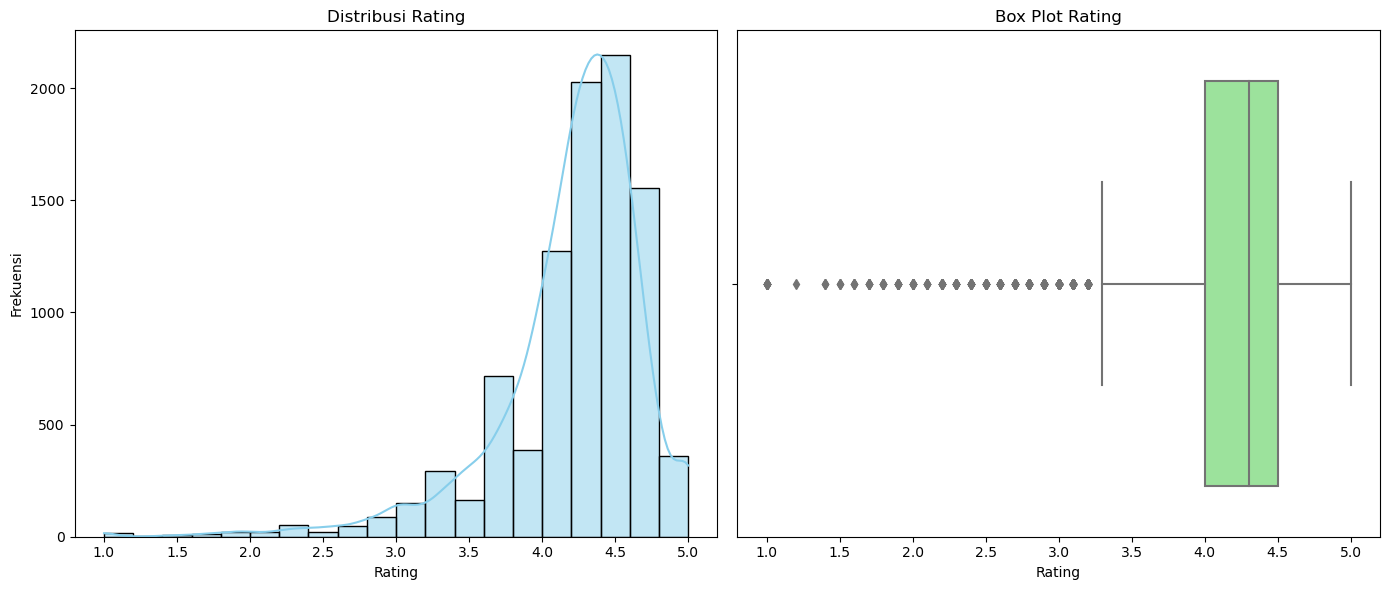

C:\Users\ANIQ FARICHATUS\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


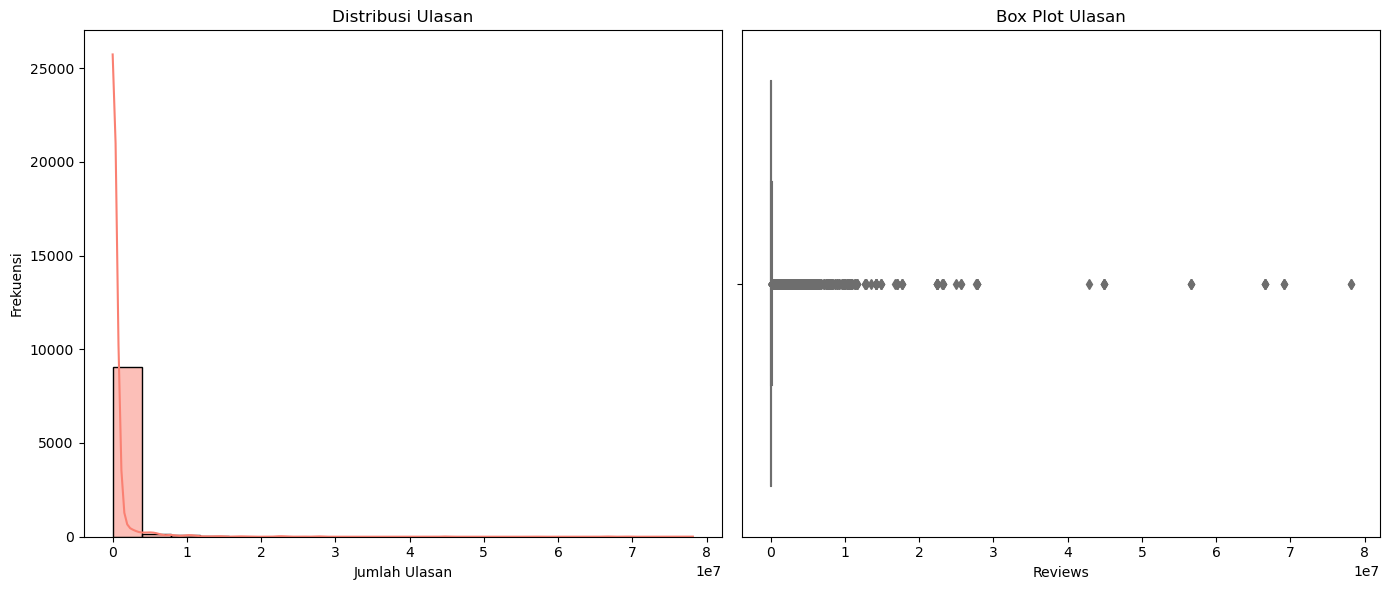

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = r'C:\Users\ANIQ FARICHATUS\Downloads\archive (5)\googleplaystore.csv'
data = pd.read_csv(csv_file_path)

# Set ukuran gambar
plt.figure(figsize=(14, 6))

# Visualisasi Rating
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')

# Box plot Rating
plt.subplot(1, 2, 2)
sns.boxplot(x=data_cleaned['Rating'], color='lightgreen')
plt.title('Box Plot Rating')

plt.tight_layout()
plt.show()

# Set ukuran gambar untuk Reviews
plt.figure(figsize=(14, 6))

# Visualisasi Reviews
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Reviews'], bins=20, kde=True, color='salmon')
plt.title('Distribusi Ulasan')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Frekuensi')

# Box plot Reviews
plt.subplot(1, 2, 2)
sns.boxplot(x=data_cleaned['Reviews'], color='lightcoral')
plt.title('Box Plot Ulasan')

plt.tight_layout()
plt.show()